In [57]:
import geopandas as gp
import urllib
import zipfile
import requests
import json
import pandas as pd
import io
import statsmodels.formula.api as smf
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
z_code=gp.GeoDataFrame.from_file("Number_of_high_schools_by_Zip_Code.shp")

In [36]:
z_code.head()

,bldgzip,url,cty_fips,st_fips,county,state,po_name,cartodb_id,zipcode,shape_len,shape_area,area,population,column_151,count_vals,count_va_1,geometry
0,0,http://www.usps.com/,047,36,Kings,NY,Brooklyn,2,11213,0.0,0.0,2.963100e+07,62426.0,,4,1.453054e-06,"POLYGON ((-73.93739763139811 40.6797295892508,..."
1,0,http://www.usps.com/,047,36,Kings,NY,Brooklyn,3,11212,0.0,0.0,4.197210e+07,83866.0,,3,7.693590e-07,POLYGON ((-73.90294132545436 40.67083977590008...
2,0,http://www.usps.com/,047,36,Kings,NY,Brooklyn,4,11225,0.0,0.0,2.369863e+07,56527.0,,7,3.179385e-06,"POLYGON ((-73.9579731604348 40.67065695897566,..."
3,0,http://www.usps.com/,047,36,Kings,NY,Brooklyn,5,11218,0.0,0.0,3.686880e+07,72280.0,,1,2.919513e-07,POLYGON ((-73.97208109564255 40.65059658727608...
4,0,http://www.usps.com/,047,36,Kings,NY,Brooklyn,6,11226,0.0,0.0,3.940860e+07,106132.0,,5,1.365678e-06,POLYGON ((-73.96190027968615 40.65487064531369...


In [39]:

school=z_code[["zipcode","count_vals","population"]]
school["schoolPP"] = school.count_vals/school.population



/Applications/Utilities/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
school.head()

,zipcode,count_vals,population,schoolPP
0,11213,4,62426.0,0.000064
1,11212,3,83866.0,0.000036
2,11225,7,56527.0,0.000124
3,11218,1,72280.0,0.000014
4,11226,5,106132.0,0.000047


In [41]:
income=pd.read_csv("incomebyzip.csv")

In [42]:
income.head()

,Unnamed: 0,ZIP code [1],Size of adjusted gross income,Number of returns,Number of joint returns,Number of dependents,Adjusted gross income (AGI)
0,10,10001,NaN,12393.0,2003.0,3030.0,1644776.0
1,18,10002,NaN,44144.0,11843.0,21571.0,1652980.0
2,26,10003,NaN,28745.0,4930.0,4481.0,4554175.0
3,34,10004,NaN,1910.0,581.0,740.0,485592.0
4,42,10005,NaN,5051.0,1121.0,1199.0,3172495.0


In [43]:
income=income[["ZIP\ncode [1]","Adjusted gross income (AGI)"]]

In [44]:
income.columns=["zipcode","income"]

In [45]:
income.head()

,zipcode,income
0,10001,1644776.0
1,10002,1652980.0
2,10003,4554175.0
3,10004,485592.0
4,10005,3172495.0


In [46]:
census=pd.read_csv("DEC_10_DP_G001_with_ann.csv",skiprows=[0])

In [47]:
census.head()

,Id,Id2,Geography,RECORD CODES - File Identification,RECORD CODES - State/US-Abbreviation (USPS),RECORD CODES - Summary Level,RECORD CODES - Geographic Component,RECORD CODES - Characteristic Iteration,RECORD CODES - Characteristic Iteration File Sequence Number,RECORD CODES - Logical Record Number,...,SPECIAL AREA CODES - State Legislative District (Lower Chamber) (Year 2),SPECIAL AREA CODES - State Legislative District (Lower Chamber) (Year 3),SPECIAL AREA CODES - State Legislative District (Lower Chamber) (Year 4),SPECIAL AREA CODES - American Indian Area/Alaska Native Area/Hawaiian Home Land Size Code,SPECIAL AREA CODES - Combined Statistical Area Size Code,SPECIAL AREA CODES - Combined NECTA Size Code,SPECIAL AREA CODES - Metropolitan Micropolitan Indicator,SPECIAL AREA CODES - NECTA Metropolitan Micropolitan Indicator,SPECIAL AREA CODES - Public Use Microdata Area,SPECIAL AREA CODES - Reserved.1
0,8600000US06390,6390,ZCTA5 06390,DPUS,US,860,0,0,,88030,...,,,,,,,,,,
1,8600000US10001,10001,ZCTA5 10001,DPUS,US,860,0,0,,89508,...,,,,,,,,,,
2,8600000US10002,10002,ZCTA5 10002,DPUS,US,860,0,0,,89510,...,,,,,,,,,,
3,8600000US10003,10003,ZCTA5 10003,DPUS,US,860,0,0,,89512,...,,,,,,,,,,
4,8600000US10004,10004,ZCTA5 10004,DPUS,US,860,0,0,,89514,...,,,,,,,,,,


In [48]:
df=pd.merge(school,income,left_on="zipcode",right_on="zipcode")

In [55]:
df.head()

,zipcode,count_vals,population,schoolPP,income
0,11213,4,62426.0,0.000064,824887.0
1,11212,3,83866.0,0.000036,969151.0
2,11225,7,56527.0,0.000124,1001094.0
3,11218,1,72280.0,0.000014,1322786.0
4,11226,5,106132.0,0.000047,1488148.0


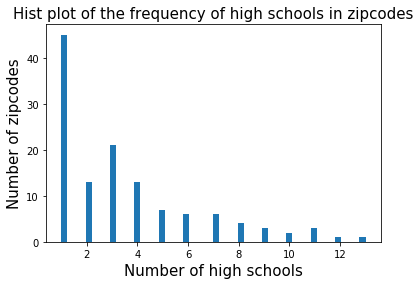

In [67]:
pl.hist(df.count_vals,bins=50)
pl.title("Hist plot of the frequency of high schools in zipcodes",fontsize = 15)
pl.ylabel("Number of zipcodes",fontsize= 15)
pl.xlabel("Number of high schools",fontsize = 15)
pl.show()

In [50]:
df.count_vals.describe()

count    125.00000
mean       3.48800
std        2.88661
min        1.00000
25%        1.00000
50%        3.00000
75%        5.00000
max       13.00000
Name: count_vals, dtype: float64

### Regression model 1 : number of schools ~ income by zip code

In [52]:
lm1=smf.ols("count_vals~income",data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             count_vals   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.2510
Date:                Thu, 14 Dec 2017   Prob (F-statistic):              0.617
Time:                        21:52:27   Log-Likelihood:                -309.25
No. Observations:                 125   AIC:                             622.5
Df Residuals:                     123   BIC:                             628.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3761      0.342      9.873      0.000       2.699       4.053
income      7.212e-08   1.44e-07      0.501      0.617   -2.13e-07    3.57e-07
==============================================================================
Omnibus:                       28.681   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.265
Skew:                           1.278   Prob(JB):                     2.98e-09
Kurtosis:                       4.002   Cond. No.                     3.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression model 2 : number of schools per person ~ income by zip code

In [53]:
lm2=smf.ols("schoolPP~income",data=df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               schoolPP   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8900
Date:                Thu, 14 Dec 2017   Prob (F-statistic):              0.347
Time:                        21:52:48   Log-Likelihood:                 927.42
No. Observations:                 125   AIC:                            -1851.
Df Residuals:                     123   BIC:                            -1845.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001   1.73e-05      5.841      0.000    6.67e-05       0.000
income      -6.86e-12   7.27e-12     -0.943      0.347   -2.13e-11    7.53e-12
==============================================================================
Omnibus:                      191.991   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12356.517
Skew:                           6.145   Prob(JB):                         0.00
Kurtosis:                      50.132   Cond. No.                     3.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression model 3 : number of schools  ~ population by zip code

In [54]:
lm3=smf.ols("count_vals~population",data=df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             count_vals   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     8.598
Date:                Thu, 14 Dec 2017   Prob (F-statistic):            0.00401
Time:                        21:53:47   Log-Likelihood:                -305.15
No. Observations:                 125   AIC:                             614.3
Df Residuals:                     123   BIC:                             620.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8666      0.607      3.074      0.003       0.665       3.068
population  3.006e-05   1.02e-05      2.932      0.004    9.77e-06    5.03e-05
==============================================================================
Omnibus:                       27.865   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.190
Skew:                           1.201   Prob(JB):                     5.10e-09
Kurtosis:                       4.251   Cond. No.                     1.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression model 4 : number of schools  ~ income & population by zip code

In [71]:
lm4=smf.ols("count_vals~income+population",data=df).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             count_vals   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     4.312
Date:                Thu, 14 Dec 2017   Prob (F-statistic):             0.0155
Time:                        22:56:38   Log-Likelihood:                -305.11
No. Observations:                 125   AIC:                             616.2
Df Residuals:                     122   BIC:                             624.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8136      0.634      2.859      0.005       0.558       3.069
income      4.213e-08    1.4e-07      0.300      0.764   -2.35e-07     3.2e-07
population  2.983e-05   1.03e-05      2.891      0.005     9.4e-06    5.02e-05
==============================================================================
Omnibus:                       27.736   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.956
Skew:                           1.196   Prob(JB):                     5.73e-09
Kurtosis:                       4.252   Cond. No.                     5.99e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_lambda(model,X_train,y_train,lambdas,p=0.4,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]
    X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,
                                    y_train, test_size = 0.4, random_state = 200)

    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train0,y_train0)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        err_OS=y_predict-y_valid
        R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_lambda = i
    
    if Graph==True:
        plt.title('IS R-squared vs OS-R-squared for different Lambda')
        if logl:
            plt.xlabel('ln(Lambda)')
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            plt.xlabel('Lambda')
            l=lambdas
            bl=best_lambda
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return best_lambda

In [78]:
lm4=smf.ols("count_vals~income+population",data=df).fit()

In [79]:
X_train = df[["income", "population"]]
y_train = df["count_vals"]

In [81]:
lambdas = np.exp(np.linspace(-5,13,200))
lambda_r_optimal=Regularization_fit_lambda(1,X_train,y_train,lambdas,p=0.4,Graph=True)
print('Optimal lambda for Ridge={0}'.format(lambda_r_optimal))

NameError: global name 'train_test_split' is not defined